In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar



In [ ]:


# Importar el archivo CSV
ruta_csv = r"..\Datasets\FILTRADO\filtro_Michigan.csv"
df = pd.read_csv(ruta_csv)

# Importar el archivo de sitios
sitio_csv = r"C:\Users\pablo\OneDrive\Documentos\CURSOS\HENRY\PROYECTO FINAL\Datasets\FILTRADO\sitios_filtrado.csv"
df_sitio = pd.read_csv(sitio_csv)


In [3]:
df_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,34.058092,-118.292130,['Korean restaurant'],4.4,18,NaN,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,NaN,33.916402,-118.010855,['Restaurant'],4.5,18,NaN,"[['Thursday', '11AM–9:30PM'], ['Friday', '11AM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,NaN,https://www.google.com/maps/place//data=!4m2!3...
2,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,NaN,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,NaN,"[['Thursday', '10AM–5:30PM'], ['Friday', '10AM...",{'Service options': ['Delivery']},Permanently closed,"['0x87ee974869295555:0x95f310d065882c9b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,['Restaurant'],4.0,8,NaN,NaN,"{'Service options': ['Delivery'], 'Amenities':...",NaN,"['0x89c6c62a40f4b733:0x73bfeec1898f272b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,NaN,21.637796,-157.920714,['Restaurant'],4.4,18,NaN,"[['Thursday', '11AM–8PM'], ['Friday', '11AM–8P...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"['0x7c00451360f80cf1:0x930291a38bab3132', '0x7...",https://www.google.com/maps/place//data=!4m2!3...


In [4]:
df.head()


,user_id,name,time,rating,text,pics,resp,gmap_id
0,118033064609544693917,Bricee Conopoulous,1613401641515,2,Good pretzels but my coffee tasted and smelled...,NaN,NaN,0x8822dd5e9801062d:0x83590505aa3f6558
1,116344327835204945643,Kevin B.,1608065551767,5,Quick bite to eat. They made the $20 bucket fr...,NaN,NaN,0x8822dd5e9801062d:0x83590505aa3f6558
2,101750687210014316888,Kortnie Hewitt,1552852048981,5,NaN,NaN,NaN,0x8822dd5e9801062d:0x83590505aa3f6558
3,113473388959669187740,Dorrie smith,1609950139434,4,NaN,NaN,NaN,0x8822dd5e9801062d:0x83590505aa3f6558
4,100204302126394024533,Diane Drake,1559521186097,5,NaN,NaN,NaN,0x8822dd5e9801062d:0x83590505aa3f6558


In [5]:
df = df.merge(df_sitio[['gmap_id', 'name']], on='gmap_id', how='left')

In [6]:
# Cambiar el nombre de las columnas name_x y name_y
df = df.rename(columns={'name_x': 'name', 'name_y': 'name_sitio'})

In [7]:
# Cantidad de filas y columnas
df.shape

(453232, 9)

In [8]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

user_id       object
name          object
time           int64
rating         int64
text          object
pics          object
resp          object
gmap_id       object
name_sitio    object
dtype: object


In [9]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id',
       'name_sitio'],
      dtype='object')

In [10]:
# Convertir las columnas  a tipo 'string'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

In [11]:
df.duplicated().sum()

19578

In [12]:
# Filas duplicadas (incluyendo los originales)
duplicadas = df[df.duplicated(keep=False)]

# Ordenamos por todas las columnas para que se vean juntas
duplicadas = duplicadas.sort_values(by=df.columns.tolist())

# Mostramos el resultado
print(duplicadas)


                      user_id              name           time  rating  \
70377   100003781877926092236    Shanti Sanders  1577623169571       5   
70378   100003781877926092236    Shanti Sanders  1577623169571       5   
264129  100004591278335608494       Alison Dean  1470525206229       1   
264147  100004591278335608494       Alison Dean  1470525206229       1   
243391  100005750586726126585   Kristy Domerese  1579368374029       4   
...                       ...               ...            ...     ...   
284459  118446199895537003735  Brandon Criswell  1554234570735       5   
311418  118446497864793649925         zo Harden  1598804080595       4   
311463  118446497864793649925         zo Harden  1598804080595       4   
157579  118446497864793649925         zo Harden  1615761096505       5   
157580  118446497864793649925         zo Harden  1615761096505       5   

                                                     text  \
70377               Lobster mac and cheese was phe

In [13]:
# Eliminar filas duplicadas
df = df.drop_duplicates()


In [14]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

user_id            0
name               1
time               0
rating             0
text          182131
pics          423007
resp          382446
gmap_id            0
name_sitio         0
dtype: int64

In [15]:
# Porcentaje de valores nulos por columna
(df.isnull().mean() * 100)

user_id        0.000000
name           0.000231
time           0.000000
rating         0.000000
text          41.999151
pics          97.544817
resp          88.191508
gmap_id        0.000000
name_sitio     0.000000
dtype: float64

In [16]:
# Estadísticas descriptivas para columnas numéricas
df.describe() 

,time,rating
count,4.336540e+05,433654.000000
mean,1.551570e+12,4.156297
std,4.180960e+10,1.181179
min,1.192669e+12,1.000000
25%,1.525406e+12,4.000000
50%,1.553894e+12,5.000000
75%,1.579116e+12,5.000000
max,1.630893e+12,5.000000


In [17]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    outliers = pd.concat([outliers, outliers_col])

print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 51771


In [18]:
# Ver de qué columnas vienen los outliers
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    cantidad = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    print(f"{col}: {cantidad} outliers")

time: 4237 outliers
rating: 47534 outliers


In [19]:
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
print("\nFechas convertidas:\n", df[['time', 'fecha']].head())


Fechas convertidas:
             time                   fecha
0  1613401641515 2021-02-15 15:07:21.515
2  1608065551767 2020-12-15 20:52:31.767
4  1552852048981 2019-03-17 19:47:28.981
6  1609950139434 2021-01-06 16:22:19.434
8  1559521186097 2019-06-03 00:19:46.097


In [20]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,name_sitio,fecha
0,118033064609544693917,Bricee Conopoulous,1613401641515,2,Good pretzels but my coffee tasted and smelled...,<NA>,<NA>,0x8822dd5e9801062d:0x83590505aa3f6558,Auntie Anne's,2021-02-15 15:07:21.515
2,116344327835204945643,Kevin B.,1608065551767,5,Quick bite to eat. They made the $20 bucket fr...,<NA>,<NA>,0x8822dd5e9801062d:0x83590505aa3f6558,Auntie Anne's,2020-12-15 20:52:31.767
4,101750687210014316888,Kortnie Hewitt,1552852048981,5,<NA>,<NA>,<NA>,0x8822dd5e9801062d:0x83590505aa3f6558,Auntie Anne's,2019-03-17 19:47:28.981
6,113473388959669187740,Dorrie smith,1609950139434,4,<NA>,<NA>,<NA>,0x8822dd5e9801062d:0x83590505aa3f6558,Auntie Anne's,2021-01-06 16:22:19.434
8,100204302126394024533,Diane Drake,1559521186097,5,<NA>,<NA>,<NA>,0x8822dd5e9801062d:0x83590505aa3f6558,Auntie Anne's,2019-06-03 00:19:46.097


# Análisis de Rating

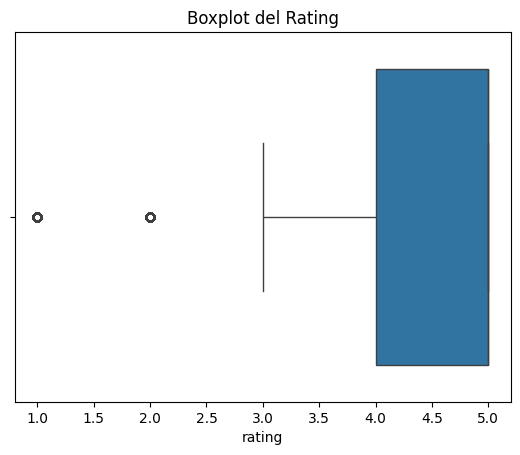

In [21]:
sns.boxplot(x='rating', data=df)
plt.title('Boxplot del Rating')
plt.show()

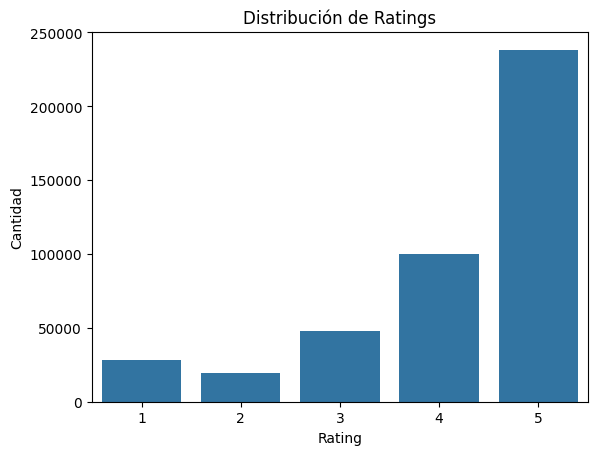

In [22]:
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()


In [23]:
# Contar cantidad de cada rating
rating_counts = df['rating'].value_counts().sort_index()

# Calcular porcentaje
rating_percentage = (rating_counts / len(df)) * 100

# Crear la tabla combinada
tabla_rating = pd.DataFrame({
    'Rating': rating_counts.index,
    'Cantidad': rating_counts.values,
    'Porcentaje (%)': rating_percentage.round(2)
})

# Mostrar la tabla
print(tabla_rating)

        Rating  Cantidad  Porcentaje (%)
rating                                  
1            1     27916            6.44
2            2     19618            4.52
3            3     47570           10.97
4            4    100217           23.11
5            5    238333           54.96


Análisis:

Más del 78% de las reseñas tienen 4 o 5 estrellas → fuerte tendencia positiva.

Solo el 11% son críticas negativas (1 o 2 estrellas).

El valor más común es 5 estrellas, lo que podría indicar alta satisfacción.


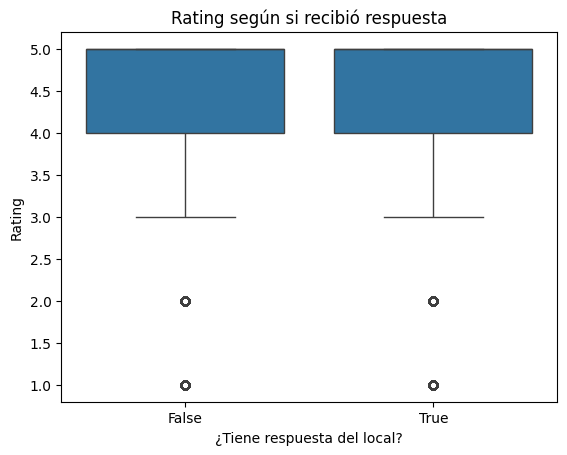

In [24]:
df['tiene_resp'] = df['resp'].notna()
sns.boxplot(x='tiene_resp', y='rating', data=df)
plt.title("Rating según si recibió respuesta")
plt.xlabel("¿Tiene respuesta del local?")
plt.ylabel("Rating")
plt.show()

Análisis:

No se muestra diferencias en la variacion de rating y la respuesta recibida

# Análisis de Review

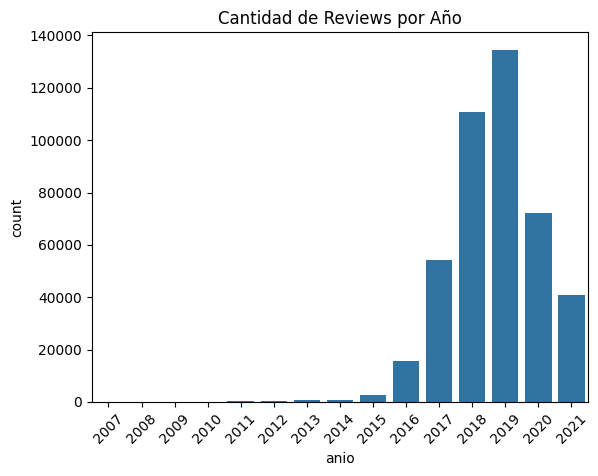

In [25]:
df['anio'] = df['fecha'].dt.year
sns.countplot(x='anio', data=df)
plt.title('Cantidad de Reviews por Año')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Asegurate de tener la columna 'anio' creada desde la fecha
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year

# Contar reviews por año
reviews_por_anio = df['anio'].value_counts().sort_index()

# Crear la tabla
tabla_reviews_anio = pd.DataFrame({
    'Año': reviews_por_anio.index,
    'Cantidad de Reviews': reviews_por_anio.values
})

# Mostrar la tabla
print(tabla_reviews_anio)

     Año  Cantidad de Reviews
0   2007                    3
1   2008                    1
2   2009                    7
3   2010                  128
4   2011                  373
5   2012                  522
6   2013                  694
7   2014                  904
8   2015                 2686
9   2016                15473
10  2017                54304
11  2018               110898
12  2019               134492
13  2020                72147
14  2021                41022


Análisis:

Se muestra un fuerte crecimiento desde 2016, con picos en 2018 y 2019.
Máximo en 2019: más de 134492 reviews.
Caída en 2020 y 2021, posiblemente relacionada con la pandemia (COVID-19 afectó la movilidad y el turismo).
Antes de 2016, el volumen de reseñas era muy bajo.

In [27]:
total_reviews = len(df)

text_count = df['text'].notna().sum()
pics_count = df['pics'].notna().sum()
resp_count = df['resp'].notna().sum()

print(f"Reviews con texto: {text_count} ({(text_count / total_reviews * 100):.2f}%)")
print(f"Reviews con fotos: {pics_count} ({(pics_count / total_reviews * 100):.2f}%)")
print(f"Reviews con respuesta: {resp_count} ({(resp_count / total_reviews * 100):.2f}%)")

Reviews con texto: 251523 (58.00%)
Reviews con fotos: 10647 (2.46%)
Reviews con respuesta: 51208 (11.81%)


In [28]:
print("Lugares únicos (gmap_id):", df['name_sitio'].nunique())

Lugares únicos (gmap_id): 2554


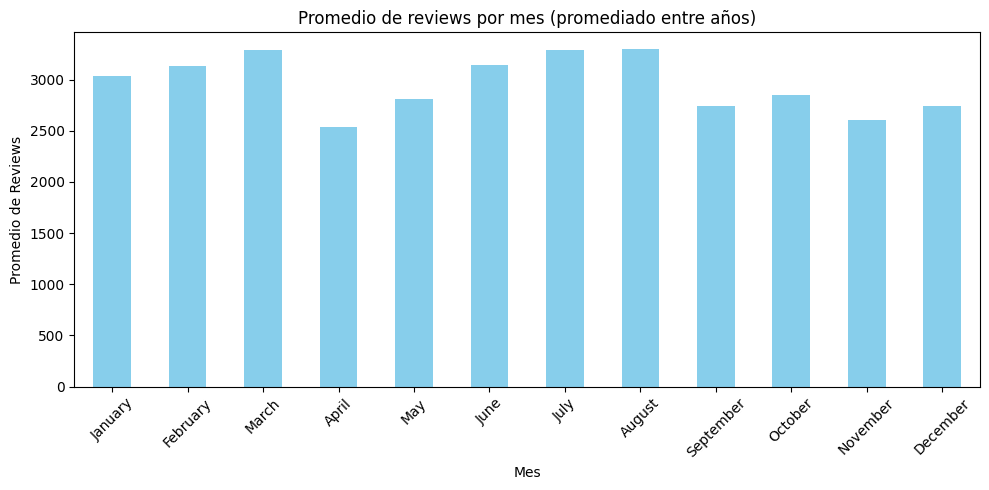

In [29]:
# Asegurar que las fechas están en formato datetime
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupar por año y mes para contar reviews
grupo_anio_mes = df.groupby(['anio', 'mes']).size().reset_index(name='cantidad')

# Calcular promedio de reviews por mes (promediado entre años)
promedio_por_mes = grupo_anio_mes.groupby('mes')['cantidad'].mean()

# Asegurar que estén los 12 meses
promedio_por_mes = promedio_por_mes.reindex(range(1, 13), fill_value=0)



# Graficar
plt.figure(figsize=(10, 5))
promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title("Promedio de reviews por mes (promediado entre años)")
plt.xlabel("Mes")
plt.ylabel("Promedio de Reviews")
plt.xticks(ticks=range(12), labels=[calendar.month_name[m] for m in range(1, 13)], rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Crear DataFrame con nombres de mes
tabla_reviews_mes = pd.DataFrame({
    'Mes': [calendar.month_name[m] for m in promedio_por_mes.index],
    'Promedio de Reviews': promedio_por_mes.values.round(2)
})

# Mostrar la tabla
print(tabla_reviews_mes)

          Mes  Promedio de Reviews
0     January              3034.33
1    February              3131.25
2       March              3292.75
3       April              2536.46
4         May              2808.00
5        June              3139.25
6        July              3290.92
7      August              3297.25
8   September              2740.31
9     October              2847.25
10   November              2605.58
11   December              2740.75


Análisis:

Actividad moderada en todo el año
Aunque no hay picos extremos, marzo, julio y agosto muestran una actividad más fuerte en promedio.

Meses más bajos: abril y noviembre
Estos meses tienden a tener menos reseñas en comparación con otros. Esto podría deberse a
temporada baja de turismo o consumo, 
condiciones climáticas o feriados que afectan el tráfico de personas.

No hay una estacionalidad clara y marcada
La diferencia entre los meses no es tan extrema como para pensar en una única temporada fuerte. Es una distribución relativamente estable, pero con altibajos sutiles.

# Análisis de Lugares

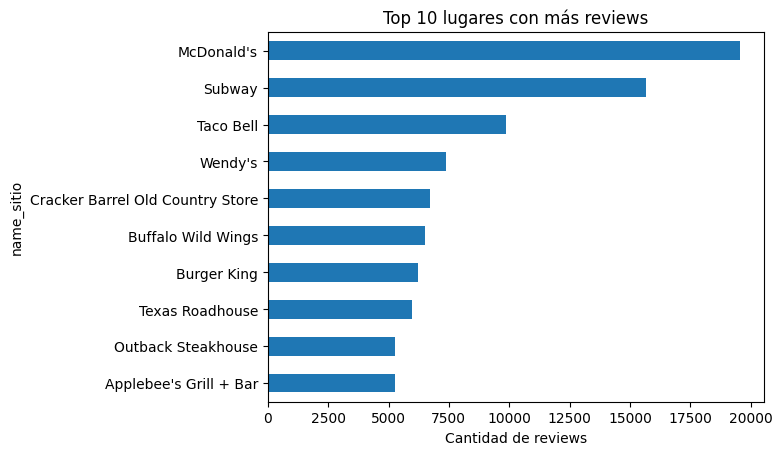

In [31]:
top_lugares = df['name_sitio'].value_counts().head(10)
top_lugares.plot(kind='barh')
plt.title("Top 10 lugares con más reviews")
plt.xlabel("Cantidad de reviews")
plt.ylabel("name_sitio")
plt.gca().invert_yaxis()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_23484\273206112.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')


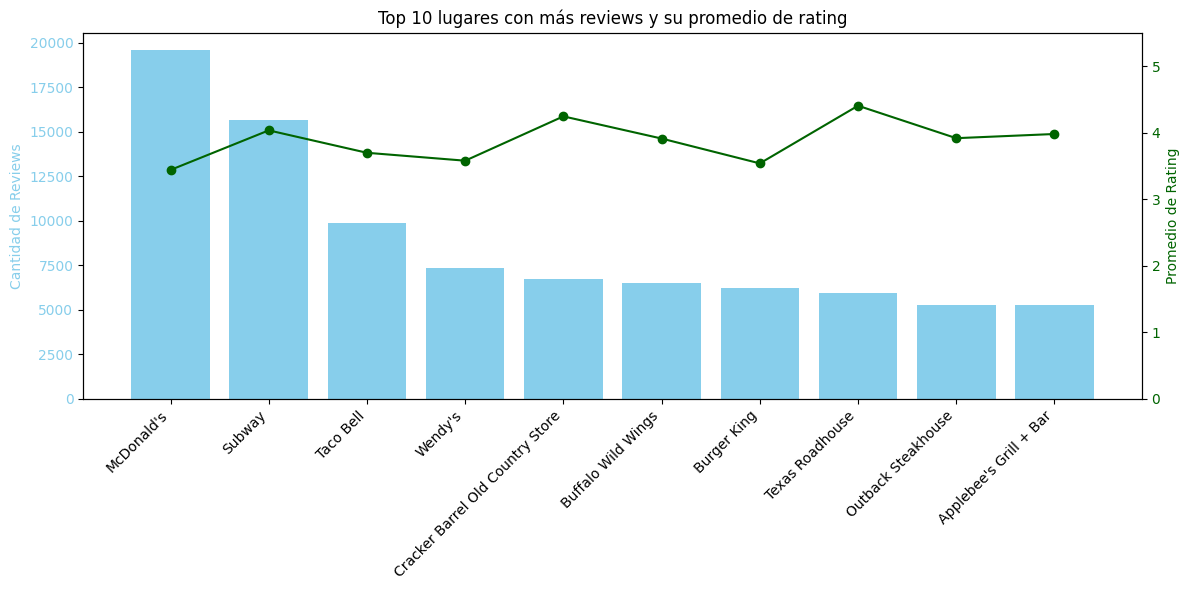

In [32]:
# Agrupar por lugar: contar y promediar ratings
estadisticas = df.groupby('name_sitio')['rating'].agg(['count', 'mean']).reset_index()
estadisticas.columns = ['name_sitio', 'Cantidad de Reviews', 'Promedio de Rating']

# Filtrar lugares con al menos 50 reviews
estadisticas_filtradas = estadisticas[estadisticas['Cantidad de Reviews'] >= 50]

# Elegir los 10 lugares con más reviews (para orden visual claro)
top10 = estadisticas_filtradas.sort_values(by='Cantidad de Reviews', ascending=False).head(10)

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo: cantidad de reviews
ax1.bar(top10['name_sitio'], top10['Cantidad de Reviews'], color='skyblue', label='Cantidad de Reviews')
ax1.set_ylabel('Cantidad de Reviews', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top10['name_sitio'], rotation=45, ha='right')

# Eje derecho: promedio de rating
ax2 = ax1.twinx()
ax2.plot(top10['name_sitio'], top10['Promedio de Rating'], color='darkgreen', marker='o', label='Promedio de Rating')
ax2.set_ylabel('Promedio de Rating', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.set_ylim(0, 5.5)

# Título y leyenda
plt.title('Top 10 lugares con más reviews y su promedio de rating')
fig.tight_layout()
plt.show()



Análisis:
Todos los lugares del top tienen un rating promedio alto, mayor a 3, lo que muestra una alta satisfacción de los usuarios.

La cantidad de reviews varía, pero todos superan las 5000, lo cual da más confianza en la calidad del promedio.

McDonals´s a pesar de tener el numero mayor de review tiene el promedio de rating mas bajo del top.

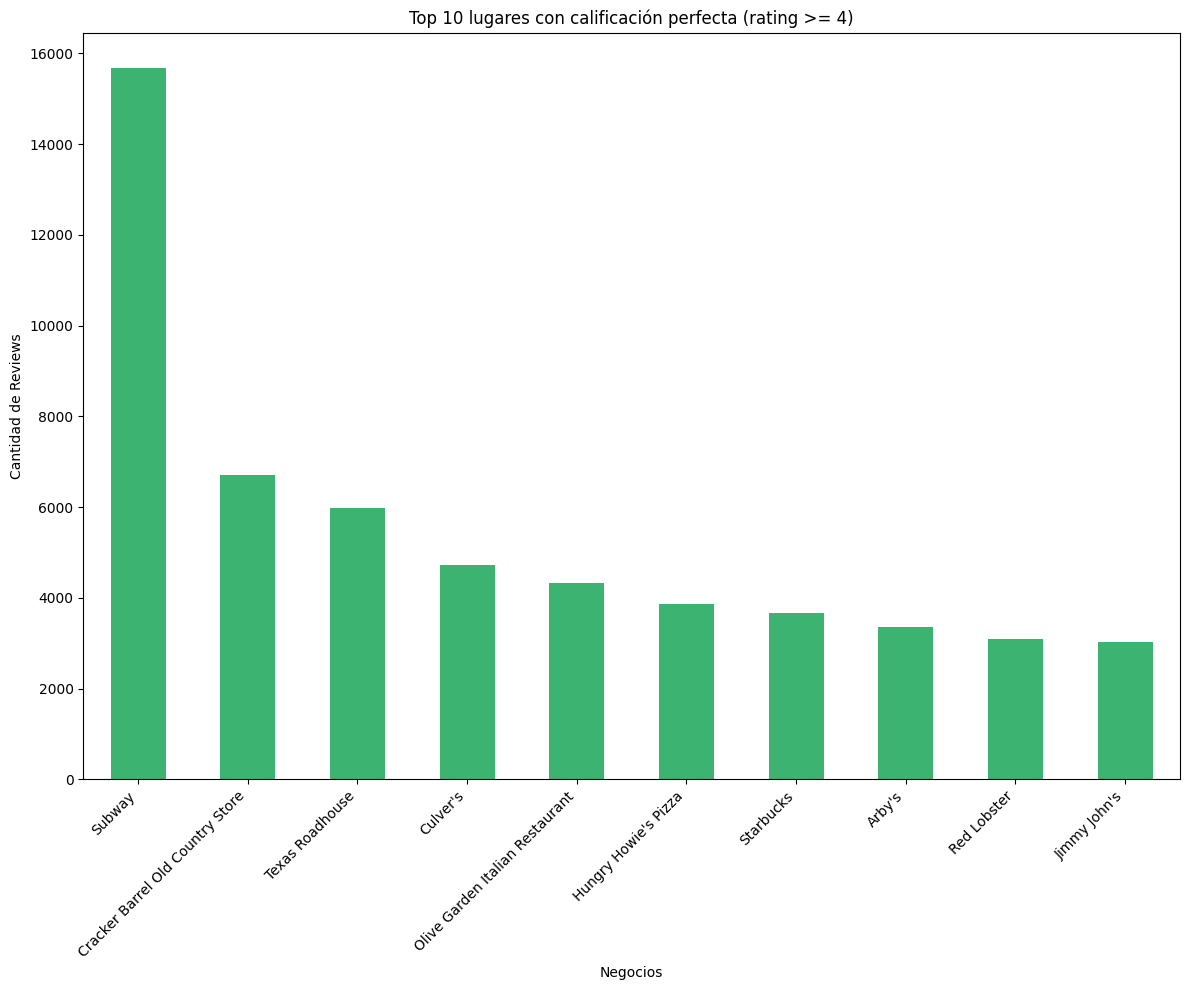

In [33]:
# Asegurar que la fecha esté en formato datetime (por si acaso)
df['fecha'] = pd.to_datetime(df['time'], unit='ms')

# Calcular el promedio de rating por lugar (gmap_id)
rating_promedio = df.groupby('name_sitio')['rating'].mean()

# Filtrar lugares con calificación perfecta
rating_maximos = rating_promedio[rating_promedio >= 4]

# Filtrar el DataFrame original para obtener solo esos lugares
top_rating_5 = df[df['name_sitio'].isin(rating_maximos.index)]

# Contar cantidad de reviews por gmap_id con rating >= 4 y quedarnos con los 10 más reseñados
top_rating_5_count = top_rating_5['name_sitio'].value_counts().head(10)

# Graficar
plt.figure(figsize=(12, 10))
top_rating_5_count.plot(kind='bar', color='mediumseagreen')
plt.title("Top 10 lugares con calificación perfecta (rating >= 4)")
plt.xlabel("Negocios")
plt.ylabel("Cantidad de Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Análisis:

Alta satisfacción con volumen relevante, todos los lugares listados tienen una combinación ideal de rating alto y muchas reseñas. Eso indica que no solo tuvieron buena suerte con pocas opiniones, sino que muchos usuarios coincidieron en su buena experiencia. Se marca la diferencia del negocio Subway por la cantidad de reviews.

Estos 10 lugares combinan excelencia en atención/producto con volumen de participación de usuarios, lo que los posiciona como referentes en calidad y satisfacción.